In [1]:
# Importing modules
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

from matplotlib import style
style.use("ggplot")

I imported first the modules.
Then I am gonna create a random dataset of cluster of points

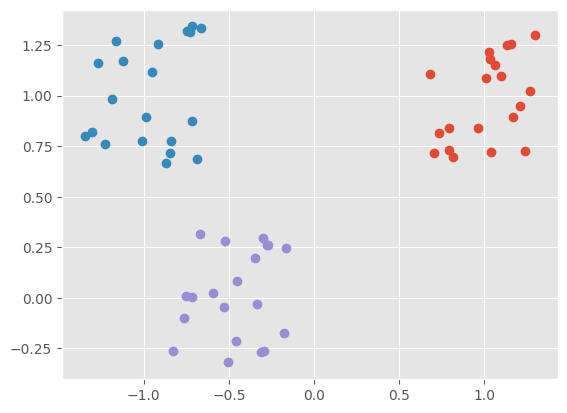

In [2]:
def points_creator(n):
    return np.random.rand(n, 2) + np.array([-.5, -.5])

def cluster_point(array, point, distance):
    return (array*distance + point)

def scatter(points, format = 'o'):
    plt.plot(points[:,0], points[:,1], format, linewidth=1)

initial_centroids = np.array([
    [1,1],
    [-1,1],
    [-.5, 0] 
])

points_clusters = np.array([cluster_point(points_creator(20),centroid,.7) for centroid in initial_centroids])
[scatter(the_points) for the_points in points_clusters]

points = points_clusters.reshape(60, 2)


Then I am gonna create a crude implementation of k-means clustering algorithms.
The algorithm is gonna be in following steps:

1. Initialize random $k$ number of centers.
2. Initialize random assignment of clusters (from $1$ to $k$, obviously)
2. Iterate for certain times:
    1. First find points which are closer to which centroid (Assign cluster to points)
    2. Second find new centroids from the assigned centroids.


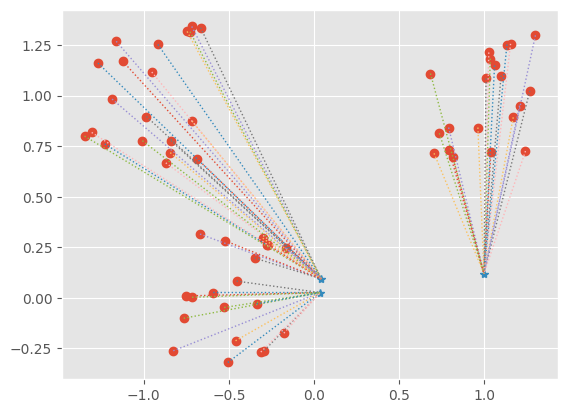

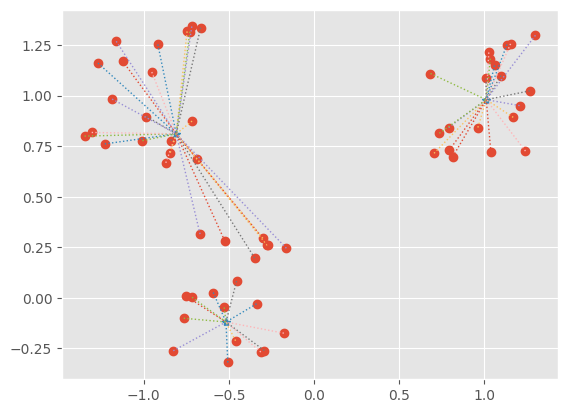

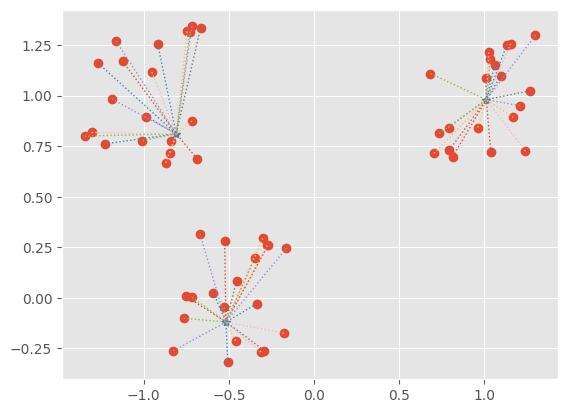

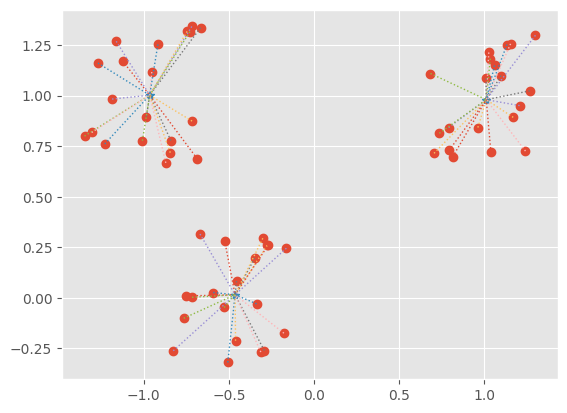

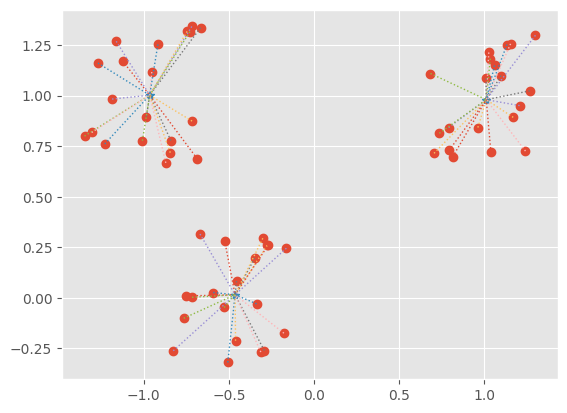

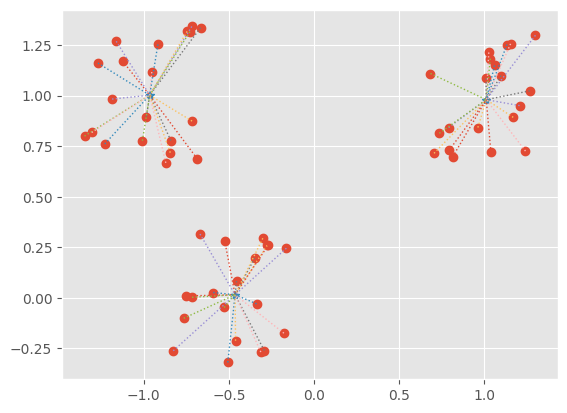

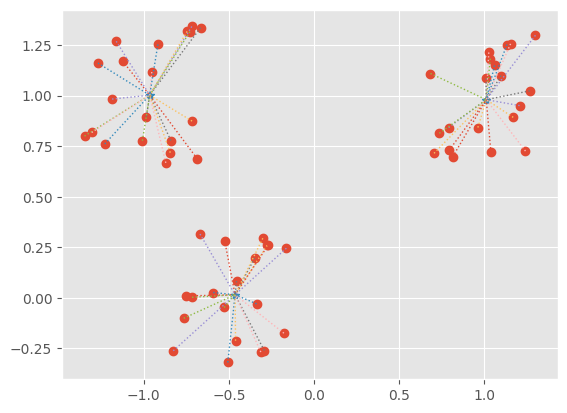

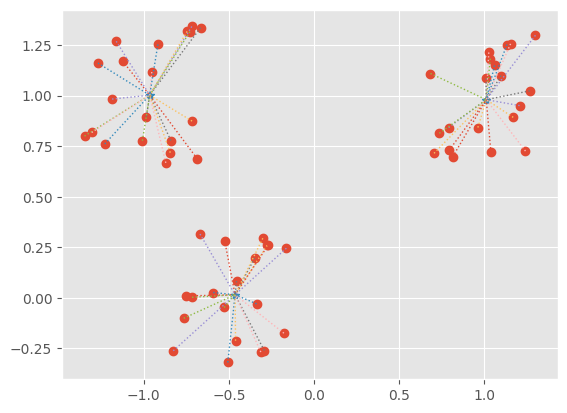

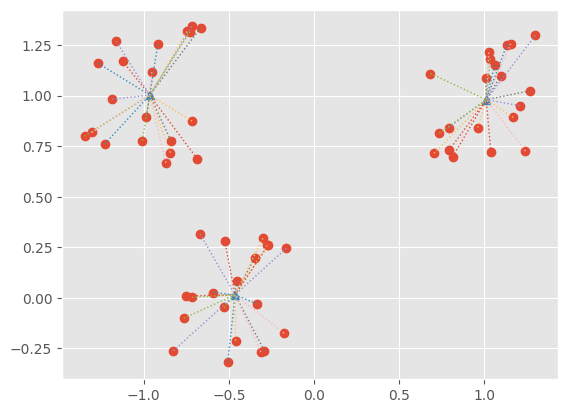

In [3]:

def squared_distance(point, point2):
    return np.dot(point, point2)

def get_min_distance_index(point, centroids):
    distance_vectors = centroids - point
    distances = [squared_distance(point, point) for point in distance_vectors]
    
    return np.argmin(distances)

def show_learning(points, centroids, assignation, format = '*'):
    scatter(points)
    scatter(centroids, format)
    for i in range(len(points)):
        scatter(np.array([points[i], centroids[assignation[i]]]), ':')
    plt.show()
        

# I will try to understand later what these mean        
cluster_centroids = np.random.rand(3,2) # 3 clusters
assignation = np.random.randint(0,3, size=len(points))
# print(assignation, cluster_centroids)
for _ in range(4):
    # Initializing for assigning cluster later on
    new_centroid_sum = np.zeros(cluster_centroids.shape)
    new_centroid_count = np.zeros(len(cluster_centroids))
    
    # Some way to display the information
    # show_learning(points, cluster_centroids, assignation)

    # Assigning cluster to points
    for i in range(len(points)):
        which_point_closer_to = get_min_distance_index(points[i], cluster_centroids)
        assignation[i] = which_point_closer_to
        new_centroid_sum[which_point_closer_to] += points[i]
        new_centroid_count[which_point_closer_to] += 1;
    
    # Finding new centroid from the points
    show_learning(points, cluster_centroids, assignation)
    cluster_centroids = np.array([pointsum / count for (pointsum, count) in zip(new_centroid_sum, new_centroid_count)])
    show_learning(points, cluster_centroids, assignation)
    # cluster_centroids = new_centroid_sum / new_centroid_count

# Some way to display the information
show_learning(points, cluster_centroids, assignation, format = '^')

        